In [2]:
%pip install hdbscan

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

%matplotlib inline

# Dimension reduction and clustering libraries
import hdbscan
import sklearn.cluster as cluster
import umap
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.30-cp39-cp39-macosx_12_0_arm64.whl size=636543 sha256=7659c11f866d65eef6f51fb041dffc16de96170b3dbbabfe84089ed5cb1ce5aa
  Stored in directory: /Users/shawn/Library/Caches/pip/wheels/99/9e/7f/0ce672c714a781cd1f254375189910f542fdee7518e00cce30
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


In [3]:
mnist = fetch_openml("mnist_784", version=1)
mnist.target = mnist.target.astype(int)

/Users/shawn/.pyenv/versions/3.9.7/envs/weave/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


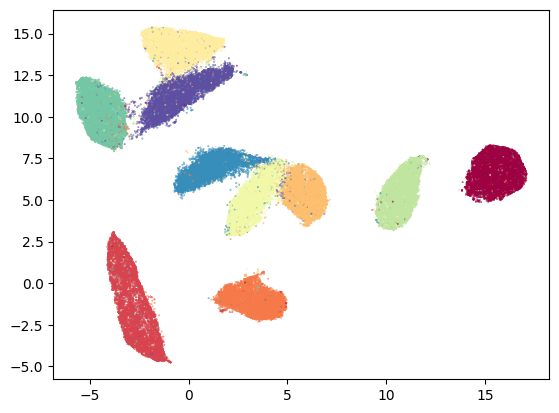

In [4]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(mnist.data)
plt.scatter(
    standard_embedding[:, 0],
    standard_embedding[:, 1],
    c=mnist.target.astype(int),
    s=0.1,
    cmap="Spectral",
)

In [5]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(mnist.data)

/Users/shawn/.pyenv/versions/3.9.7/envs/weave/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


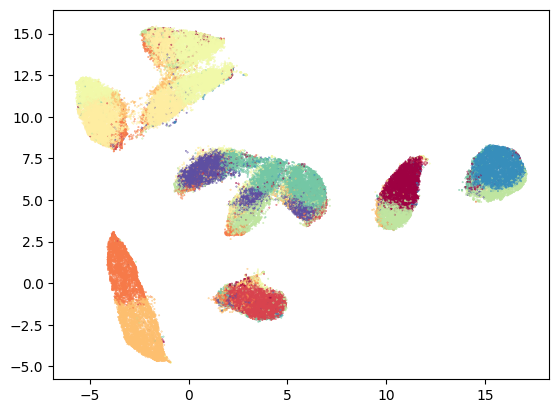

In [7]:
plt.scatter(
    standard_embedding[:, 0],
    standard_embedding[:, 1],
    c=kmeans_labels,
    s=0.1,
    cmap="Spectral",
);

In [8]:
(
    adjusted_rand_score(mnist.target, kmeans_labels),
    adjusted_mutual_info_score(mnist.target, kmeans_labels),
)

(0.36520869228069386, 0.49960152825058146)

In [9]:
lowd_mnist = PCA(n_components=50).fit_transform(mnist.data)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(
    lowd_mnist
)

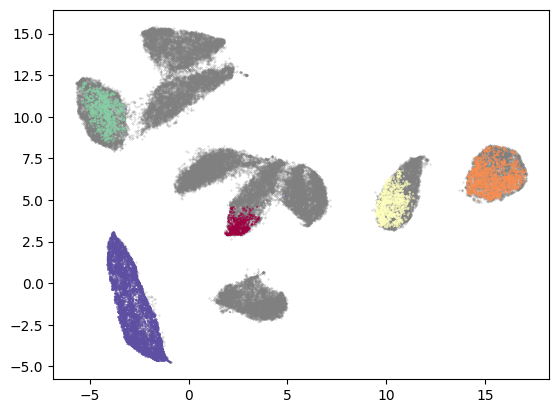

In [10]:
clustered = hdbscan_labels >= 0
plt.scatter(
    standard_embedding[~clustered, 0],
    standard_embedding[~clustered, 1],
    color=(0.5, 0.5, 0.5),
    s=0.1,
    alpha=0.5,
)
plt.scatter(
    standard_embedding[clustered, 0],
    standard_embedding[clustered, 1],
    c=hdbscan_labels[clustered],
    s=0.1,
    cmap="Spectral",
);

In [11]:
(
    adjusted_rand_score(mnist.target, hdbscan_labels),
    adjusted_mutual_info_score(mnist.target, hdbscan_labels),
)

(0.05276113941871598, 0.3020262916849027)

In [12]:
clustered = hdbscan_labels >= 0
(
    adjusted_rand_score(mnist.target[clustered], hdbscan_labels[clustered]),
    adjusted_mutual_info_score(mnist.target[clustered], hdbscan_labels[clustered]),
)

(0.9987327022433244, 0.9967177309707838)

In [13]:
np.sum(clustered) / mnist.data.shape[0]

0.16652857142857141

In [14]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(mnist.data)

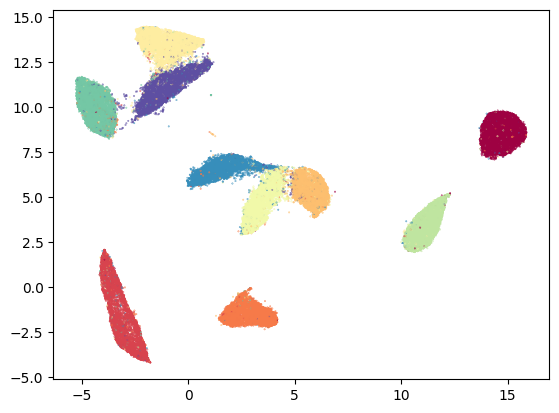

In [15]:
plt.scatter(
    clusterable_embedding[:, 0],
    clusterable_embedding[:, 1],
    c=mnist.target,
    s=0.1,
    cmap="Spectral",
)

In [16]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)